In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.metrics import f1_score
from utils import read_corpus, cv_kfold, train_validate_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [7]:
X_train, Y_train = read_corpus('datasets/train.txt', False)
X_test, Y_test = read_corpus('datasets/test.txt', False)

### Train vs Test Labels Distribution

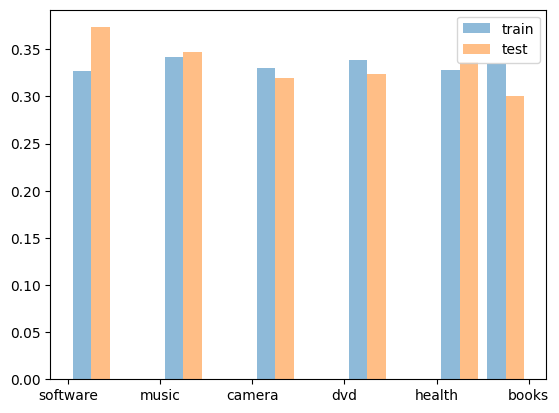

In [8]:
plt.hist([Y_train,Y_test], alpha=0.5, density=True, label=['train','test'])
plt.legend(loc='upper right')
plt.show()

In [9]:
def identity(inp):
    '''Dummy function that just returns the input'''
    return inp
count = CountVectorizer(preprocessor=identity)
tf_idf = TfidfVectorizer(preprocessor=identity)
hashing=HashingVectorizer(preprocessor=identity)

In [10]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9207407407407407


### Combining Vectorizors

In [11]:
#TF IDF + CountVec
union = FeatureUnion([("count", count), ("tf", tf_idf)])
classifier = Pipeline([
    ('union', union),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.8709259259259259


In [12]:
#TF IDF + HashingVec
union = FeatureUnion([("tf", tf_idf), ("hashing", hashing)])
classifier = Pipeline([
    ('union', union),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9153703703703704


### TF IDF Parameters Experiment

In [13]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english")

In [14]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9205555555555556


In [15]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",binary=True)

In [16]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9188888888888889


In [21]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True)

In [22]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9235185185185185


### n-grams

In [35]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,2))

In [36]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9268518518518518


In [37]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,3))

In [38]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9253703703703704


### Filtering features based on relevance or frequency

In [45]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,2),min_df=0.01)

In [46]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.8694444444444445


In [47]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,2),max_df=0.99)

In [48]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.9268518518518518


In [51]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,2),max_features=1000)


In [52]:
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC())
])
kfold_result = cv_kfold(
    classifier,
    X_train,
    Y_train,
    lambda *x: f1_score(*x, average='micro'),
    k=4,
    verbose=1
)
print('f1 score OOF', kfold_result['oof_score'])

Folds:   0%|          | 0/4 [00:00<?, ?it/s]

f1 score OOF 0.8837037037037037


### Hyperparameter (c) optimization 

In [67]:
cs=[x * 0.1 for x in range(1, 31)]
f1=[]
for c in tqdm(cs):
    tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,2))
    classifier = Pipeline([
        ('tf', tf_idf),
        ('cls', LinearSVC(C=c))
    ])
    a = lambda *x: f1_score(*x, average='micro')
    kfold_result = cv_kfold(
        classifier,
        X_train,
        Y_train,
        a,
        k=4,
        verbose=0,
    )
    f1.append(kfold_result['oof_score'])

100%|███████████████████████████████████████████| 30/30 [11:59<00:00, 23.99s/it]


Text(0, 0.5, 'F1 Score')

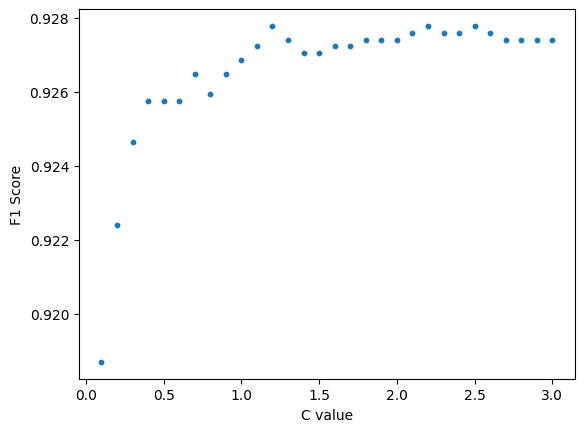

In [69]:
plt.scatter(cs,f1,s=10)
plt.xlabel('C value')
plt.ylabel('F1 Score')

In [70]:
print ("Optimum C value:", cs[f1.index(max(f1))])
print ("Best F1 validation Score:", max(f1))

Optimum C value: 1.2000000000000002
Best F1 validation Score: 0.9277777777777778


### Test Set Score

In [73]:
tf_idf = TfidfVectorizer(preprocessor=identity,stop_words="english",sublinear_tf=True,ngram_range=(1,2))
classifier = Pipeline([
    ('tf', tf_idf),
    ('cls', LinearSVC(C=1.2))
])
fn = lambda *x: f1_score(*x, average='micro')

test_results = train_validate_split(
    classifier,
    X_train,
    Y_train,
    X_test,
    Y_test,
    fn,
    verbose=1
)

In [77]:
print("Test Score:",test_results['score'])

Test Score: 0.9316666666666665
